In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets

In [4]:
# Task 1
def laguerre_pol(t, n, beta = 2, sigma = 4):
    # Check if the input parameters are valid
    if n < 0 or beta < 0:
        raise ValueError('"beta" and "n" must be positive')
    if beta > sigma:
        raise ValueError('"beta" must be less than "sigma"')
    # Calculate the first two Laguerre polynomials
    l_0 = np.sqrt(sigma) * np.exp(-beta * t / 2)
    l_1 = np.sqrt(sigma) * (1 - sigma * t) * np.exp(-beta * t / 2)
    
    # Return the appropriate Laguerre polynomial
    if n == 0:
        return l_0
    if n == 1:
        return l_1
    if n >= 2:
        # Calculate the next Laguerre polynomial using the recurrence relation
        l_next = (2 * 2 - 1 - t * sigma) / 2 * l_1 - (2 - 1) / 2 * l_0
        for j in range(3, n+1):
            l_0 = l_1
            l_1 = l_next
            l_next = (2 * j - 1 - t * sigma) / j * l_1 - (j - 1) / j * l_0
        return l_next
laguerre_pol(3, 5, 2, 4)

2.728331346558944

In [24]:
# Task 2
def tabulate_laguerre(n, T, step = 0.1, beta = 2, sigma = 4):
    # Check if the input parameters are valid
    if beta < 0:
        raise ValueError('Value "beta" must be positive')
    if sigma < beta:
        raise ValueError('Value "sigma" must be greater than beta')
    if n < 0:
        raise ValueError('Value "n" must be positive')
    # Generate the values at which the Laguerre polynomial will be evaluated
    values = np.arange(0, T, step)
    results = []
    # Calculate the Laguerre polynomial at each value and store the results
    for i in values:
        results.append(laguerre_pol(i, n, beta, sigma))
    return pd.DataFrame(data = {'value': values, f'L_{n}': results})

wd_n = ipywidgets.IntSlider(min=1,max=20,value=1)
wd_t = ipywidgets.IntSlider(min=1,max=20,value=1)

ipywidgets.interact(tabulate_laguerre,n=wd_n,T=wd_t,step=ipywidgets.fixed(0.1),beta=ipywidgets.fixed(2),sigma=ipywidgets.fixed(4))

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), IntSlider(value=1, description='T', …

<function __main__.tabulate_laguerre(n, T, step=0.1, beta=2, sigma=4)>

In [31]:
# Task 3:

def experiment(N = 20, beta = 2, sigma = 4, T = 100, eps = 0.001):
    
    # Check if the input parameters are valid
    if T < 0 or eps < 0 or N < 0 or beta < 0:
        raise ValueError('T, epsilon, N and beta must be positive')
    if beta > sigma:
        raise ValueError('beta must be less than sigma')
    
    # Generate the values at which the Laguerre polynomial will be evaluated
    values = np.linspace(0, T, 1000)
    n = range(0, N + 1)
    res = None
    
    # Find the first value for which all Laguerre polynomials are less than epsilon
    for i in values:
        check = True
        for j in n:
            if abs(laguerre_pol(i, j, beta, sigma)) > eps:
                check = False
                break
        if check and res is None:
            res = i
            break
        
    # Tabulate the Laguerre polynomials at the found value
    tabulation = []
    for i in n:
        tabulation.append(laguerre_pol(res, i, beta, sigma))
    return res, pd.DataFrame(data = {'n': n, 'f': tabulation})

r, df = experiment()
print(f"Task 3: result = {r}\n")
df

Task 3: result = 79.07907907907908



,n,f
0,0,9.066138e-35
1,1,-2.858701e-32
2,2,4.478343e-30
3,3,-4.647081e-28
4,4,3.593209e-26
5,5,-2.208132e-24
6,6,1.123332e-22
7,7,-4.865604e-21
8,8,1.831625e-19
9,9,-6.087176e-18


In [32]:
# Task 4:

def met_rectangles(f, start, end, points=1000):
    # Generate the points at which 'f' will be evaluated
    x = np.linspace(start, end, points)
    # Calculate the sum of the function values at the points
    s = sum([f(i) for i in x])
    # Return the integral approximation
    return s * abs(end - start) / points

def transform_laguerre(f, N, points=1000, beta=2, sigma=4):
    # Check if the input parameters are valid
    if N < 0 or points < 0 or beta < 0:
        raise ValueError('N, points, and beta must be positive')
    if beta > sigma:
        raise ValueError('beta must be less than sigma')
    
    # Define the function to be integrated
    def integral(t):
        return f(t) * laguerre_pol(t, N, beta, sigma) * np.exp(-(sigma-beta) * t)
    
    # Find the end point of the integral
    end = experiment(N, beta, sigma)[0]
    
    # Return the integral of the transformed function
    return met_rectangles(integral, 0, end, points)

# Define the function to be integrated
f = lambda x: np.exp(-x)
met_rectangles(f, 0, 100, 10000)


1.0049083341528509

In [33]:
# Task 5:

def transform_tabulate_laguerre(f, N, points=1000, beta=2, sigma=4):
    # Check if the input parameters are valid
    if N < 0 or points < 0 or beta < 0:
        raise ValueError('N, points, and beta must be positive')
    if beta > sigma:
        raise ValueError('beta must be less than sigma')
    
    # Generate the values at which the transformed function will be evaluated
    values = range(0, N)
    results = []
    
    # Calculate the transformed function at each value and store the results
    for i in values:
        results.append(transform_laguerre(f, i, points, beta, sigma))
    
    # Return the results as a pandas DataFrame
    return pd.DataFrame(data={'value': values, 'f': results})

# Define the function to be transformed
def f(t):
    if t >= 2 * np.pi:
        return 0
    return np.sin(t - np.pi / 2) + 1

wd_n = ipywidgets.IntSlider(min=1, max=20, value=10)

ipywidgets.interact(
    transform_tabulate_laguerre,
    f=ipywidgets.fixed(f),
    N=wd_n,
    points=ipywidgets.fixed(1000),
    beta=ipywidgets.fixed(2),
    sigma=ipywidgets.fixed(4)
)
# transform_tabulate_laguerre(f, 20, 1000)


interactive(children=(IntSlider(value=10, description='N', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.transform_tabulate_laguerre(f, N, points=1000, beta=2, sigma=4)>

In [34]:
# Task 6:

def reversed_transform_laguerre(seq, t, beta=2, sigma=4):
    sum_res = 0
    
    # Calculate the sum of the sequence elements multiplied by the Laguerre polynomial
    for i in range(0, len(seq)):
        sum_res += seq[i] * laguerre_pol(t, i, beta, sigma)
    
    # Return the result of the reverse transformation
    return sum_res

# Define the function to be tested
def test_f(x):
    return x ** 2

reversed_transform_laguerre(transform_tabulate_laguerre(test_f, 20, 1000)['f'], 3)


8.991189909755084

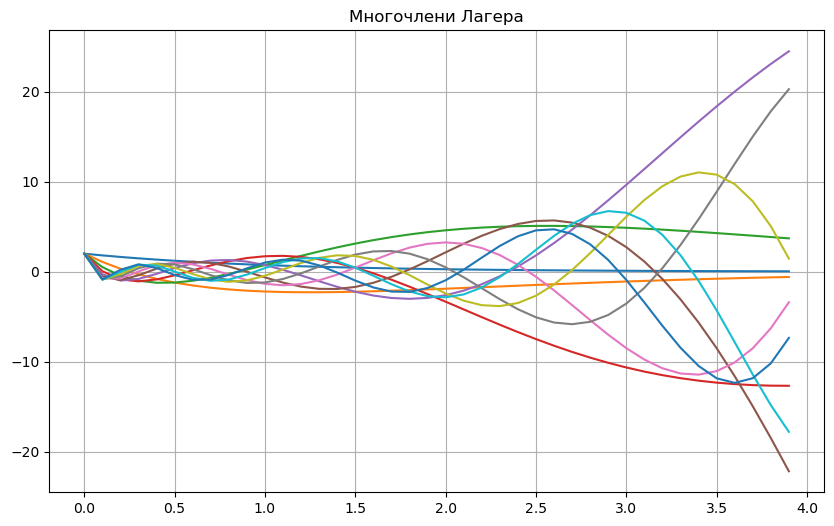

In [35]:
# Task 7:

def laguerre_graph(T, N, step=0.1, beta=2, sigma=4):
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Plot the Laguerre polynomial for each degree less than or equal to N
    for n in range(0, N + 1):
        df_tabulation = tabulate_laguerre(n, T, step, beta, sigma)
        plt.plot(df_tabulation['value'], df_tabulation[f'L_{n}'], label=f'n={n}')
    
    plt.title('Многочлени Лагера')
    plt.grid()
    plt.savefig("figure_01.png")
    plt.show()

laguerre_graph(4, 10)


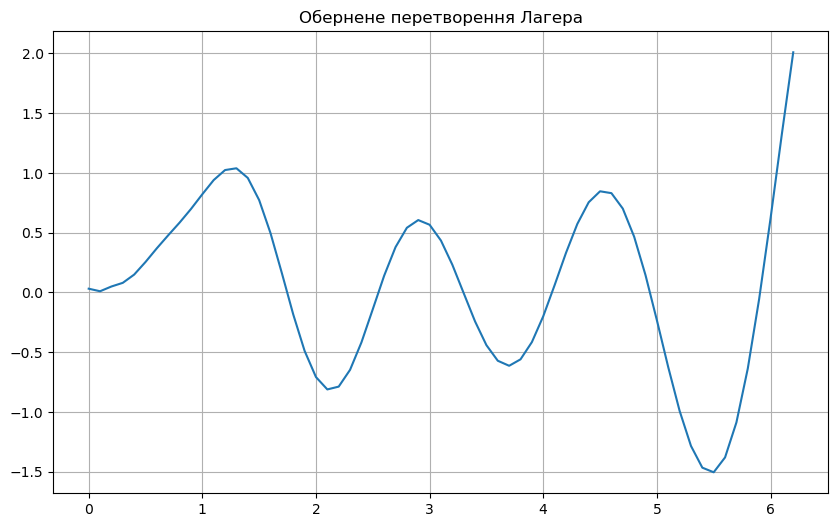

In [37]:
# Task 8:

def reversed_transform_laguerre_graph(f, N, T=np.pi * 2, step=0.1, points=1000, beta=2, sigma=4):
    # Transform and tabulate the function
    seq = transform_tabulate_laguerre(f, N, points, beta, sigma)['f']
    
    # Generate the values at which the reverse transformation will be evaluated
    values = np.arange(0, T, step)
    res = []
    
    # Calculate the reverse transformation at each value and store the results
    for i in values:
        res.append(reversed_transform_laguerre(seq, i, beta, sigma))
    
    reversed_tabulation = pd.DataFrame(data={'value': values, 'f(value)': res})
    
    plt.figure(figsize=(10, 6))
    plt.plot(reversed_tabulation['value'], reversed_tabulation['f(value)'])
    plt.title('Обернене перетворення Лагера')
    plt.grid()
    plt.savefig("figure_02.png")
    plt.show()

def test_f2(x):
    return np.sin(x**2)

reversed_transform_laguerre_graph(test_f2,20) 
